<h1 id="punto-1">Punto 1</h1>

## Punto 1.1 <a id="punto-1-1"></a>

In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv(r"../data/raw/casas_dev.csv") 

df.sample(5, random_state=42)


,area,area_units,is_house,has_pool,age,price,lat,lon,rooms
70,872.0,sqft,0,0,11.0,630.0,40.718433,-74.008699,2.0
827,1076.0,sqft,0,0,7.0,772.0,40.707037,-73.998823,3.0
231,137.0,m2,0,0,10.0,214.0,-34.550223,-58.391268,4.0
588,775.0,sqft,1,1,10.0,751.0,40.726223,-74.043929,2.0
39,154.0,m2,1,0,16.0,273.0,-34.563525,-58.347365,4.0


In [2]:

df.describe(include='all')


,area,area_units,is_house,has_pool,age,price,lat,lon,rooms
count,900.000000,900,900.000000,900.000000,770.000000,900.000000,900.000000,900.000000,828.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,m2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,533.598889,NaN,0.418889,0.144444,10.212987,466.197778,1.966225,-65.967203,2.737923
std,502.318230,NaN,0.493651,0.351735,4.773010,347.122903,37.661269,7.813671,0.948574
min,40.000000,NaN,0.000000,0.000000,1.000000,65.000000,-34.686302,-74.058238,1.000000
25%,93.000000,NaN,0.000000,0.000000,6.250000,178.750000,-34.605803,-74.005566,2.000000
50%,164.500000,NaN,0.000000,0.000000,11.000000,323.500000,-34.529704,-58.459293,3.000000
75%,980.000000,NaN,1.000000,0.000000,14.000000,712.500000,40.709819,-58.379873,3.000000


Algo que es particular resaltar es que la feature ```area_units``` no tiene sentido que se mantenga. Podemos realizar una conversión a metros cuadrados, eliminar está feature y agregar ```area``` en metros cuadrados.

Convertimos la feature ```sqft``` a ```m2``` y eliminamos la columna ```area_units```

In [3]:
df.loc[df['area_units'] == 'sqft', 'area'] = df['area'] * 0.092903
df.loc[df['area_units'] == 'sqft', 'area_units'] = 'm2'

df = df.drop('area_units', axis=1)

df.describe(include='all')

,area,is_house,has_pool,age,price,lat,lon,rooms
count,900.000000,900.000000,900.000000,770.000000,900.000000,900.000000,900.000000,828.000000
mean,94.794747,0.418889,0.144444,10.212987,466.197778,1.966225,-65.967203,2.737923
std,30.220560,0.493651,0.351735,4.773010,347.122903,37.661269,7.813671,0.948574
min,40.000000,0.000000,0.000000,1.000000,65.000000,-34.686302,-74.058238,1.000000
25%,74.000000,0.000000,0.000000,6.250000,178.750000,-34.605803,-74.005566,2.000000
50%,92.995903,0.000000,0.000000,11.000000,323.500000,-34.529704,-58.459293,3.000000
75%,111.264314,1.000000,0.000000,14.000000,712.500000,40.709819,-58.379873,3.000000
max,237.000000,1.000000,1.000000,20.000000,1992.000000,40.764550,-58.295919,5.000000


Hacemos un análisis de las features que contienen NaNs.

In [4]:
from utils.data import get_nan_features

nan_features = get_nan_features(df) 


print("Features con valores nulos y su cantidad de valores nulos: ", nan_features.items())


Features con valores nulos y su cantidad de valores nulos:  dict_items([('age', 130), ('rooms', 72)])


Observamos que las features con ```NaNs``` son ```age``` y ```room```.

Obtenemos la distribucion empirica de la feature ```rooms``` y de ```age```

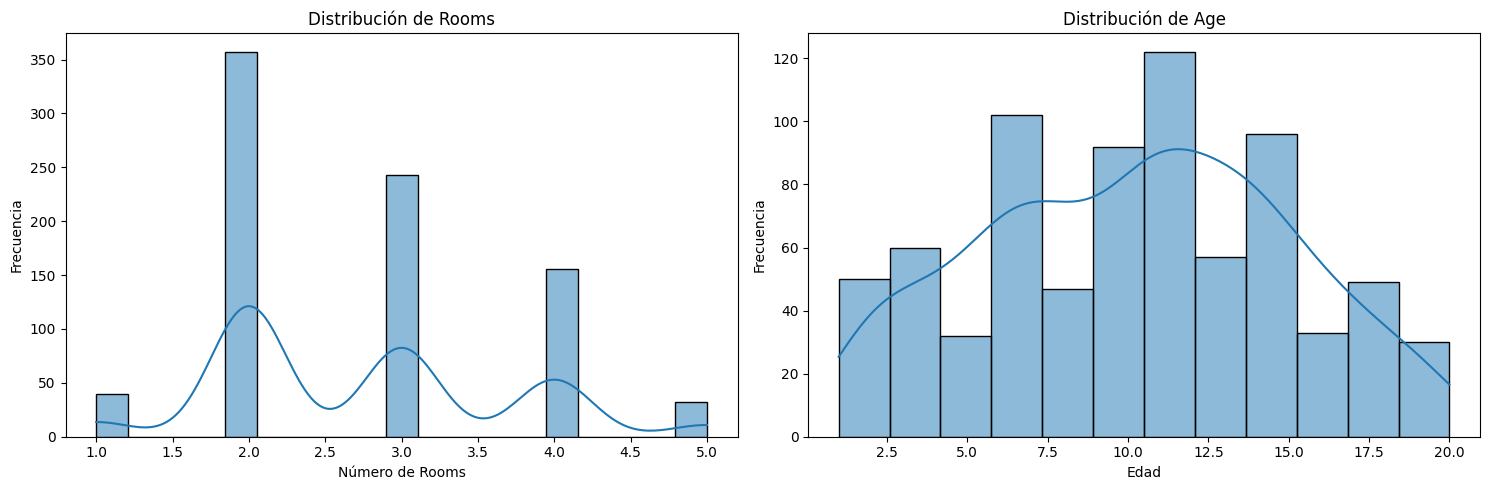

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['rooms'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Rooms')
axes[0].set_xlabel('Número de Rooms')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['age'], kde=True, ax=axes[1])
axes[1].set_title('Distribución de Age')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [6]:
# ver cantidad de filas que se pierden
df.isna().sum().sum()


np.int64(202)

Observamos que la media de ```roooms``` es ```2.737``` y que la media de ```age``` es ```10.212```. Podemos reemplazar en las muestras (filas) que tienen ```NaNs``` con la media. Al reemplazar los valores perdidos (NaNs) con la media, se mantiene la escala original de la variable y se evitan valores atípicos fuera de rango, lo que ayuda a preservar en cierta medida la distribución

Esto es un proceso válido ya que al reemplazar los NaNs con la media, la variable conserva su escala original (no se generan valores fuera de rango ni se produce un sesgo), lo que ayuda a mantener la consistencia de la información que aporta esa variable. 

Si en el conjunto de datos existen varios grupos con medias distintas, imputar los valores faltantes con una única media global genera una sobreestimación en los grupos cuya media es menor y una subestimación en aquellos con una media mayor. Esto distorsiona la distribución real de cada subgrupo, lo que puede conducir a conclusiones equivocadas al mezclar la información de todos los grupos en un solo valor (ver inciso 4).

Además, al ignorar las diferencias entre subgrupos, se pierden matices importantes de la variabilidad interna de los datos, lo que introduce un sesgo sistemático. 

Podríamos también eliminar las filas que tienen ```NaNs```, pero esto haría que perdamos 202 filas, lo que es bastante cantidad.

Por último, otra solución sería utilizar un modelo NO LINEAL para predecir estas features, solución que excede este TP.




In [7]:

features_to_impute = ['rooms', 'age']


for feature in features_to_impute:

    mean_value = df[feature].mean()
    
    df[feature] = df[feature].fillna(mean_value)
    
    print(f'Imputando en {feature} con la media: {mean_value}')
    

print(df.head())

Imputando en rooms con la media: 2.7379227053140096
Imputando en age con la media: 10.212987012987012
         area  is_house  has_pool   age  price        lat        lon  rooms
0   58.993405         1         0  18.0  546.0  40.679064 -74.007844    2.0
1  102.007494         0         0   9.0  759.0  40.712839 -73.967750    3.0
2   61.966301         0         0   7.0  464.0  40.669863 -74.029414    2.0
3  127.000000         1         1  16.0  251.0 -34.600437 -58.415266    4.0
4  128.020334         0         0   8.0  963.0  40.722322 -73.983229    4.0


Guardamos el dataframe en un CSV.

In [8]:
df.to_csv(r"../data/processed/casas_dev.csv", index=False)

## Punto 1.2 <a id="punto-1-2"></a>



<div style="padding: 10px; border-radius: 5px;">
    <p>
        Realice una serie de histogramas y diagramas de dispersión (scatterplots) para mostrar
        la relación entre las variables. Para esto, es útil el comando <code>pairplot</code>. 
        ¿Qué conclusiones puede extraer a simple vista acerca de las relaciones entre las variables? 
        Se permite la creación de gráficos adicionales que considere relevantes.
    </p>
</div>


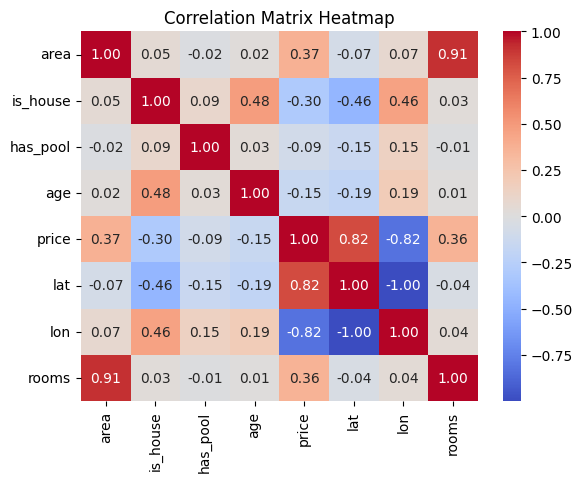

,area,is_house,has_pool,age,price,lat,lon,rooms
area,1.000000,0.047767,-0.020012,0.020607,0.371862,-0.071974,0.071787,0.907964
is_house,0.047767,1.000000,0.093175,0.482947,-0.298412,-0.459865,0.459664,0.029574
has_pool,-0.020012,0.093175,1.000000,0.033317,-0.088624,-0.146234,0.146399,-0.007955
age,0.020607,0.482947,0.033317,1.000000,-0.149007,-0.194795,0.194773,0.013094
price,0.371862,-0.298412,-0.088624,-0.149007,1.000000,0.822490,-0.822537,0.359635
lat,-0.071974,-0.459865,-0.146234,-0.194795,0.822490,1.000000,-0.999992,-0.040040
lon,0.071787,0.459664,0.146399,0.194773,-0.822537,-0.999992,1.000000,0.039892
rooms,0.907964,0.029574,-0.007955,0.013094,0.359635,-0.040040,0.039892,1.000000


In [9]:
import seaborn as sns 


# matriz de correlación
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

corr

Observamos que la variable **area** presenta una correlación muy alta de 0.91 con **rooms**, lo que es totalmente coherente, ya que a medida que aumenta la cantidad de habitaciones, la superficie total de la propiedad tiende a crecer. Además, la **latitud (lat)** muestra una fuerte correlación positiva de 0.82 con **price**, lo que sugiere que las propiedades ubicadas en zonas con mayor latitud tienden a tener precios más altos; en contraposición, la **longitud (lon)** tiene una correlación negativa de -0.82 con **price**, lo que indica que en las áreas donde la longitud es mayor, los precios son más bajos. Esto podría interpretarse como que existen zonas geográficas diferenciadas, donde la posición en el mapa influye significativamente en el valor de la propiedad. 

Por otro lado, se observa una correlación moderada de 0.48 entre **is_house** y **age**, lo que sugiere que las casas (frente a otros tipos de propiedades) tienden a ser más antiguas. Asimismo, **is_house** se relaciona moderadamente con las coordenadas: presenta una correlación de -0.46 con **lat** y de 0.46 con **lon**, lo que puede indicar que las casas se concentran en áreas geográficas específicas distintas a aquellas de otros inmuebles. 

Finalmente, resulta destacable la casi perfecta correlación negativa de -1.0 entre **lat** y **lon**, lo que implica que, dentro del rango de datos, a medida que aumenta la latitud, la longitud disminuye de forma casi lineal, reflejando probablemente una distribución geográfica particular de las propiedades. Estos patrones nos ayudan a entender que la ubicación y el tipo de inmueble son determinantes importantes en la configuración del precio y otras características de las viviendas en el dataset.

Podriamos clasificar las casas por zonas (clusters) en base a la latitud y longitud.

En el siguiente gráfico se observan en mayor detalle las relaciones entre las variables.

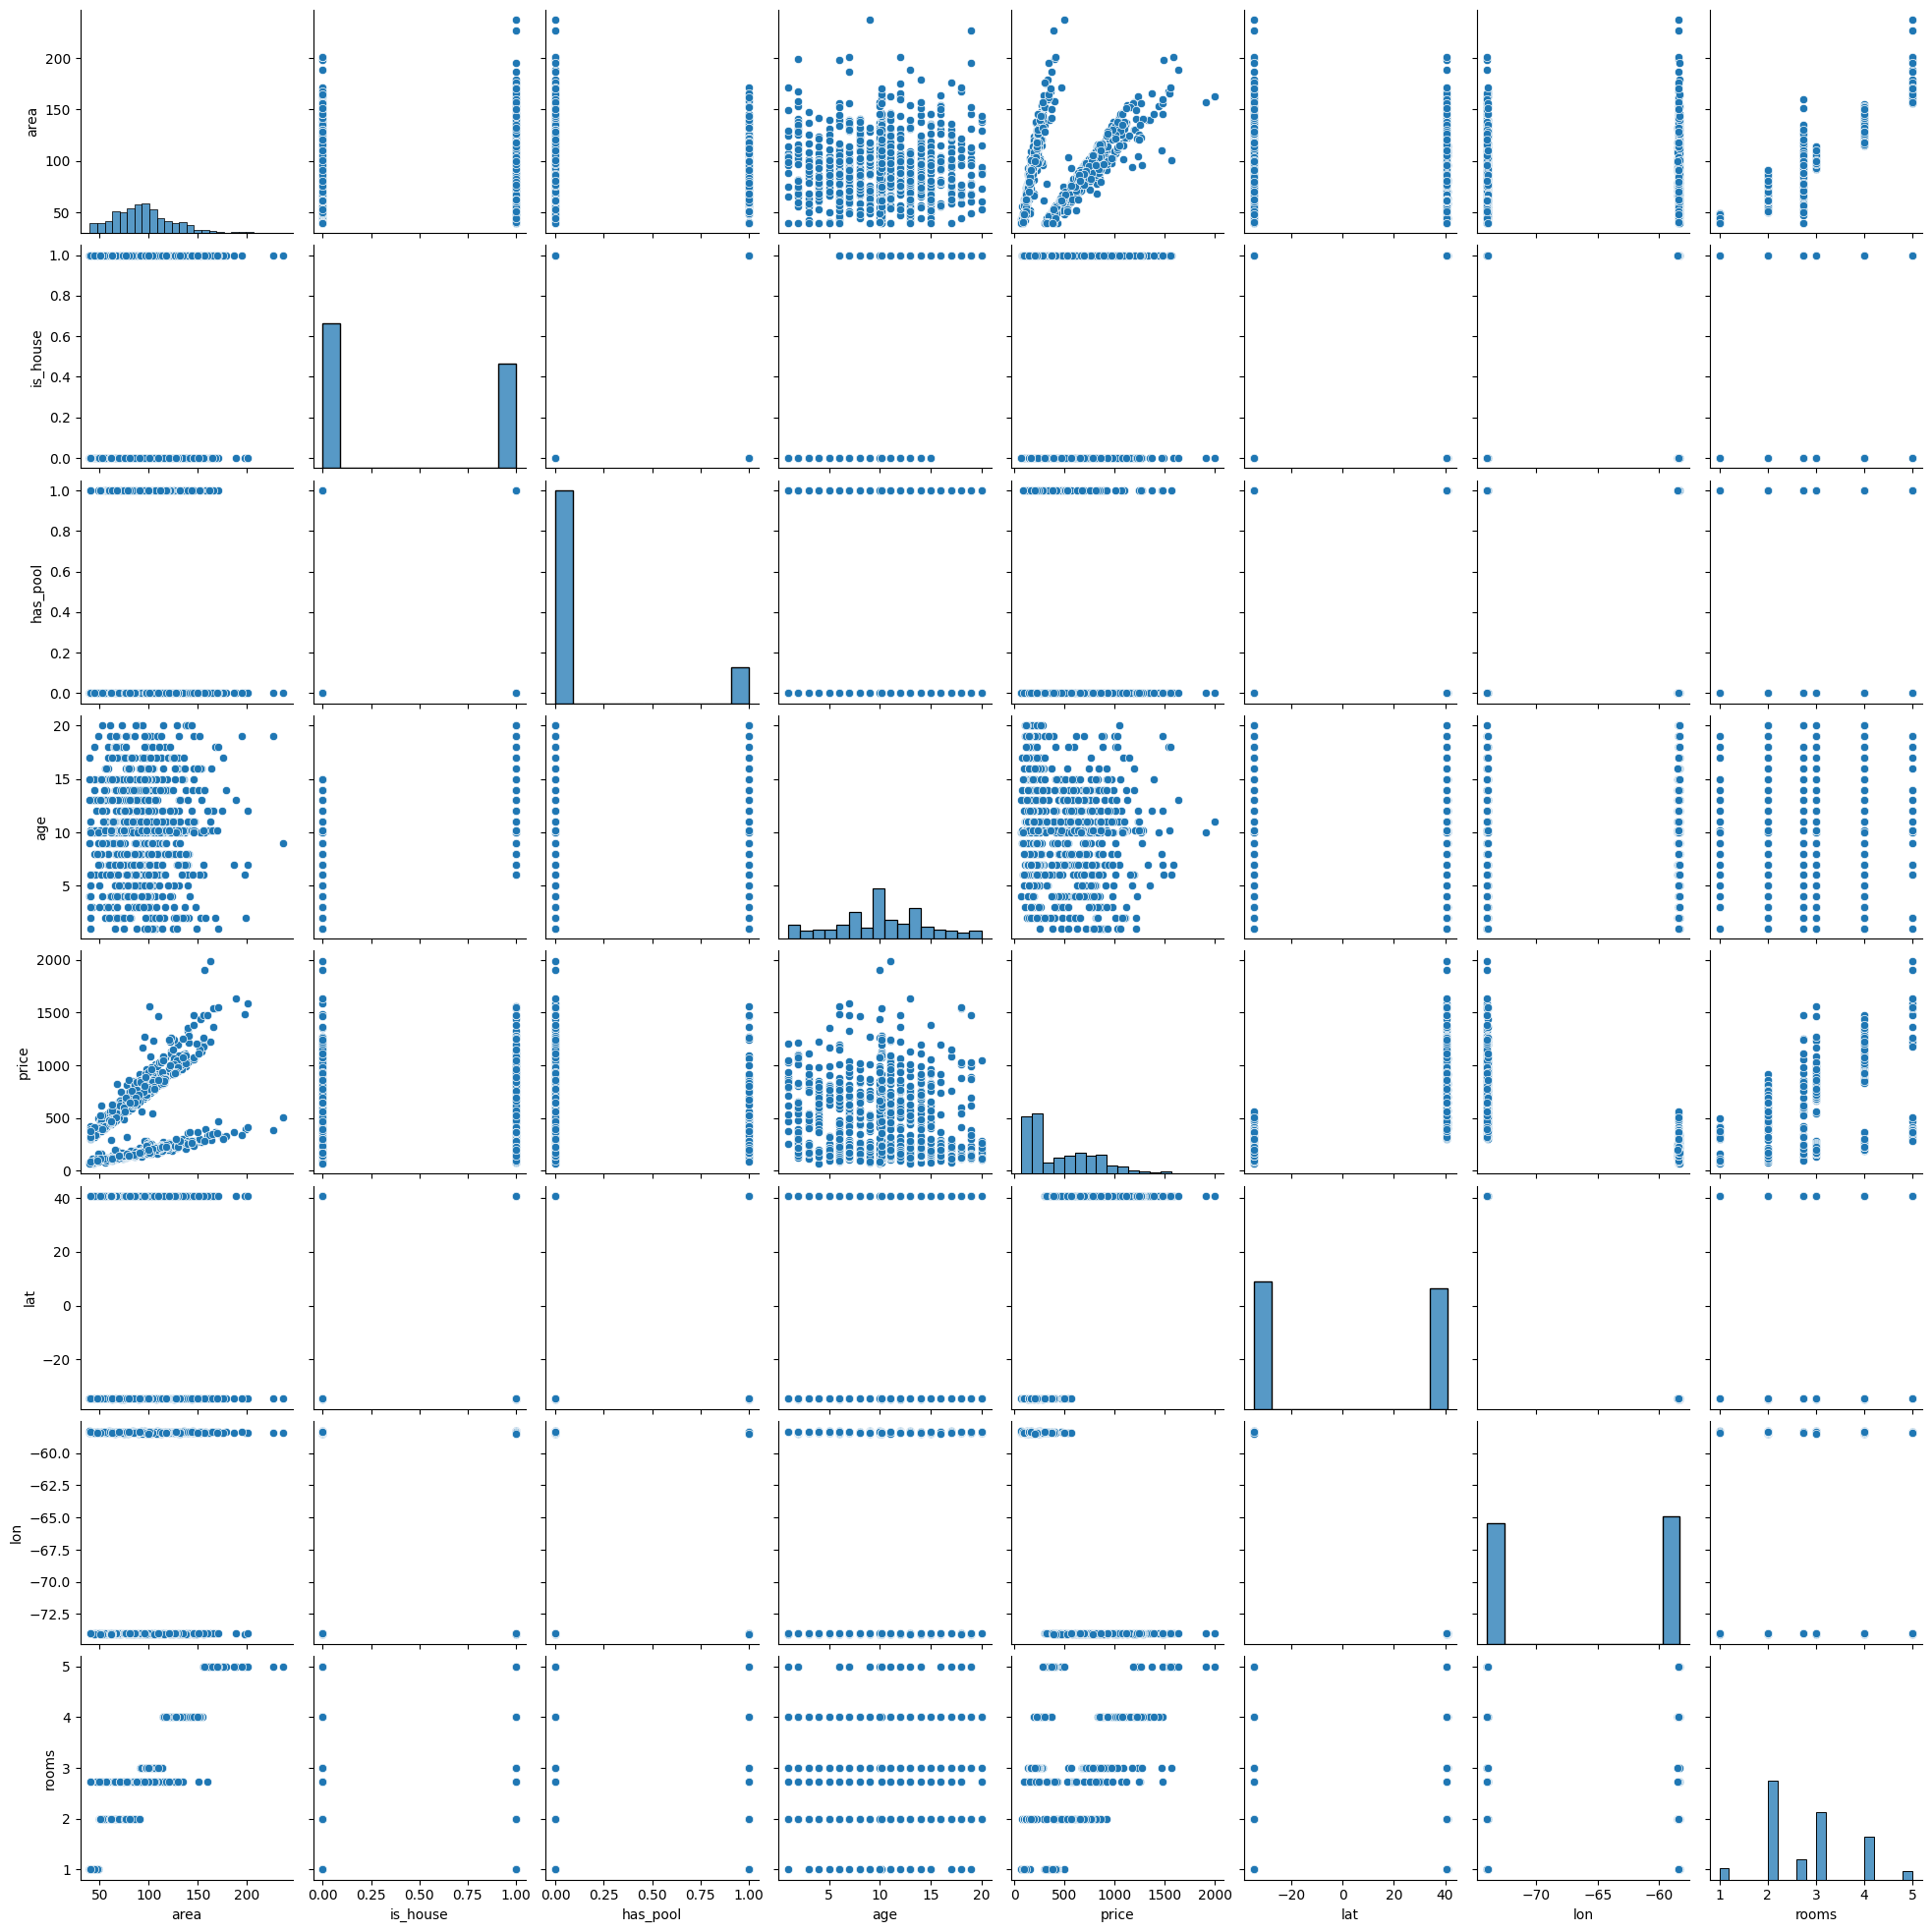

In [10]:
sns.pairplot(df)
plt.show()

Observamos en los gráficos de latitud y longitud como estan estrictamente correlacionados con una pendiente negativa. Parece haber 2 clusters en el mismo, caracteristica que explotaremos en el inciso 4. 

Por otro lado, en el grafico de area vs price notamos una correlacion positiva, lo que indicaria que a mayor area mayor es el precio, algo que es relativamente logico. Similarmente se nota este patron en el grafico de rooms vs price y rooms vs area.

Tambien notamos una correlacion positica entre latitud vs price, dandonos un indicador que ciertas zonas tienden a incrementar el valor de los inmuebles, mientras que la longitud vs price tiene una correlacion negativa, indicandonos

Por ultimo, notamos como, si el inmubele es una casa, tiende a tener mayor edad que aquellso que no



## Punto 1.3 <a id="punto-1-3"></a>


Divida el conjunto de desarrollo casas_dev.csv en un 80 % para entrenamiento (train)
y un 20 % para validación (validation). Estos conjuntos se utilizarán para entrenar y
validar los modelos que desarrollarán en las siguientes secciones. Se sugiere normalizar
los datos para lograr un mejora el condicionamiento numérico de los algortmos de
aprendizaje. Recuerde que si normaliza los datos, cuando haga una predicción deberá
invertir la normalización para volver a las escalas originales.

In [11]:
from utils.data import split_test_train_with_label

df = pd.read_csv(r"../data/processed/casas_dev.csv")

X = df.drop('price', axis=1)
y = df['price']


X_train, X_test, y_train, y_test = split_test_train_with_label(X, y, test_size=0.2, random_state=12,normalize=True)


# Punto 2

### Todas las features (menos price)

#### Pseudo Inversa

In [12]:
from utils.model import train_and_evaluate_model
from models.regression.linear_regressor import LinearRegressor

results_linear_psinv_all = train_and_evaluate_model( # si no aplico log(y), el modelo es relativamente "malo"
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    transform_target=None,
    model_class=LinearRegressor,
    normalize_features=False,
    fit_params={'method': "pseudo_inverse",
                "loss": "mse"},
    metrics=['mse', 'r2', 'mae']
)

model_linear_psinv_all = results_linear_psinv_all["model"]



=== Model Evaluation (LinearRegressor) - Metrics   Space: original===
MSE: 11630.160150
R2: 0.904712
Método: pseudo_inverse
Intercept: 3677.5350

Coeficientes:
------------------------------
area            | +4.9952
is_house        | +75.3474
has_pool        | +43.4141
age             | -3.4354
lat             | +19.9893
lon             | +56.3301
rooms           | -3.9214


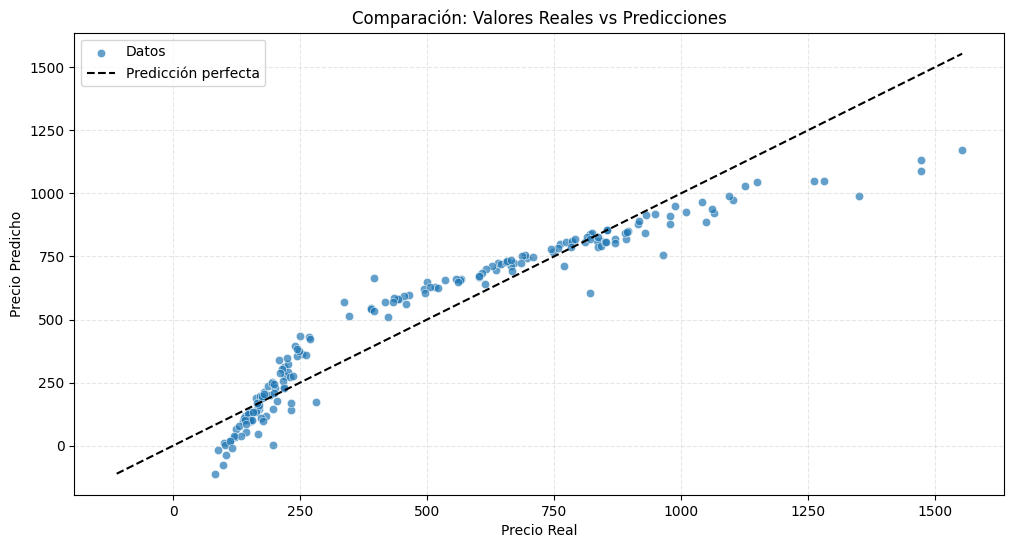

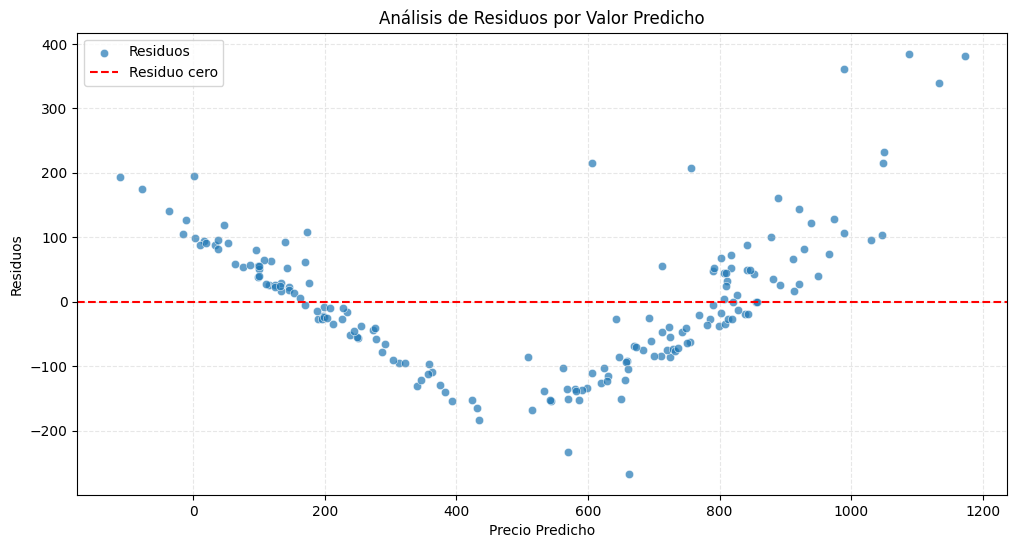

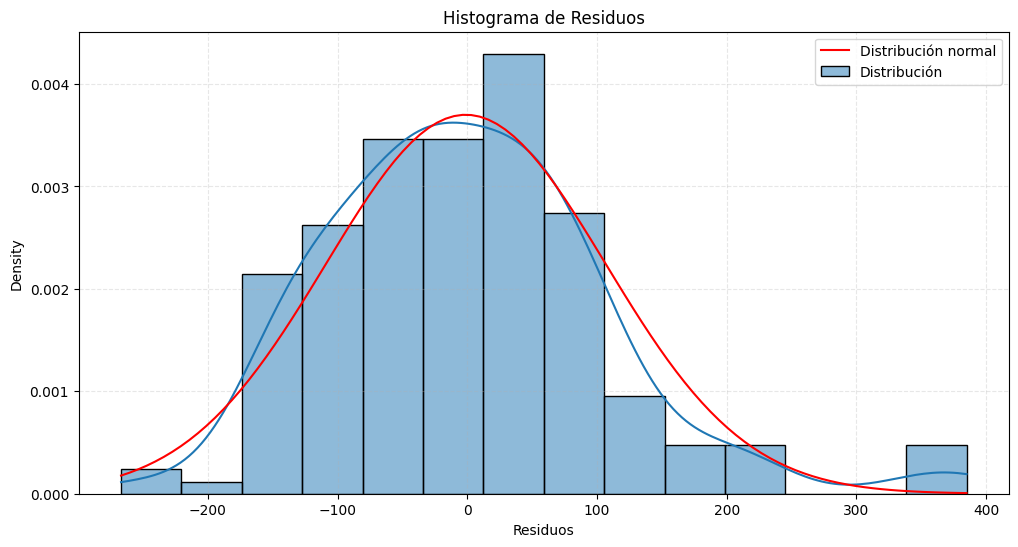

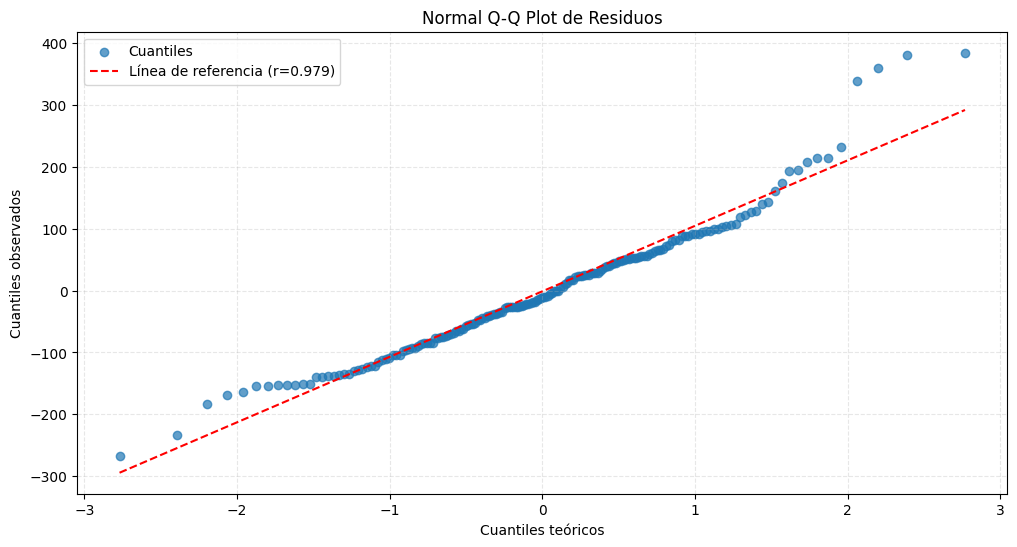

In [13]:
from utils.visuals import visualize_regression_results

custom_titles = {
    "scatter": "Comparación: Valores Reales vs Predicciones",
    "residuals": "Análisis de Residuos por Valor Predicho",
    "distribution": "Histograma de Residuos"
}


figures_linear_psinv_all = visualize_regression_results(
    results_linear_psinv_all['y_test'],
    results_linear_psinv_all['y_pred_test'],
    transform_func=None,
    fig_size=(12, 6),
    titles=custom_titles,
    show_figures=True
)



Los gráficos muestran en primer lugar, en el diagrama de valores predichos vs. residuos, que la varianza de los errores no se mantiene constante a lo largo de todo el rango de valores y se observa cierta curvatura empinada que sugiere una relación no capturada por el modelo o heterocedasticidad. Al mismo tiempo, el Q-Q plot (asumiendo una distribución normal) indica que, en general, los residuos se aproximan a la distribución normal, aunque se aprecian leves desvíos que podría deberse a la presencia de outliers. El histograma de residuos confirma que la mayoría se concentra cerca de cero pero existen valores atípicos que se extienden hacia la cola positiva. Conviene revisar si el modelo está capturando adecuadamente la forma funcional de las variables, por ejemplo, incluyendo términos polinómicos (inciso 4) o interacciones en caso de relaciones no lineales. Ridge o Lasso pueden ayudar si hay multicolinealidad o sobreajuste, ya que estabilizan los coeficientes y reducen la varianza de las estimaciones, pero no resuelven de manera directa la heterocedasticidad. 

#### Gradient Descent

In [14]:
from utils.model import train_and_evaluate_model
from models.regression.linear_regressor import LinearRegressor

results_gd_linear_all = train_and_evaluate_model(
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=True,
    fit_params={'method': 'gradient_descent',
                "epochs": 1000,
                "learning_rate":0.01
                },
    metrics=['mse', 'r2', 'mae']
    )

model_gd_linear_all = results_gd_linear_all["model"]



=== Model Evaluation (LinearRegressor) - Metrics   Space: original===
MSE: 11654.140146
R2: 0.904515
Método: gradient_descent
Intercept: 455.7167

Coeficientes:
------------------------------
area            | +139.8104
is_house        | +37.2665
has_pool        | +15.0462
age             | -14.7437
lat             | +155.9551
lon             | -155.8073
rooms           | +10.0213
Convergencia: Sí
Iteraciones: 1000/1000


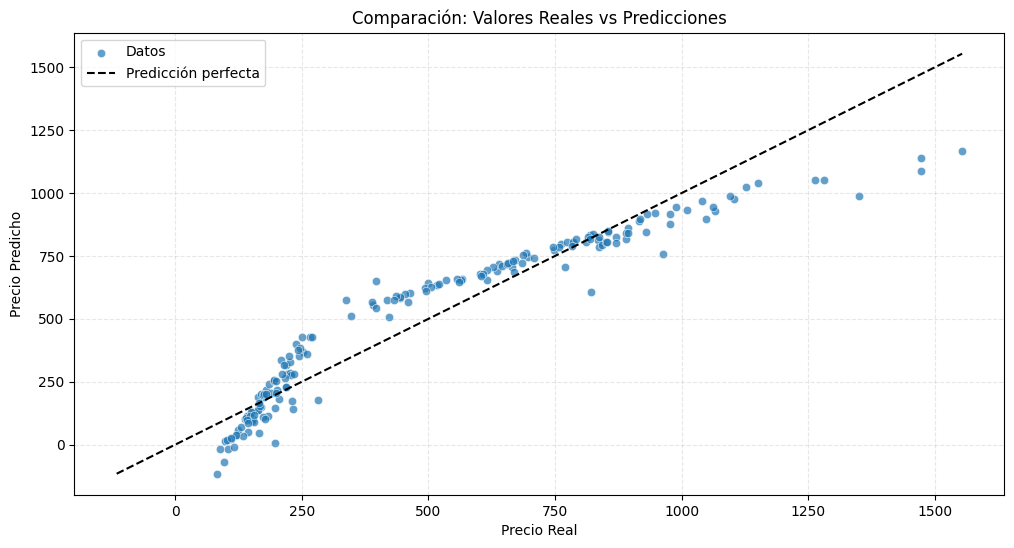

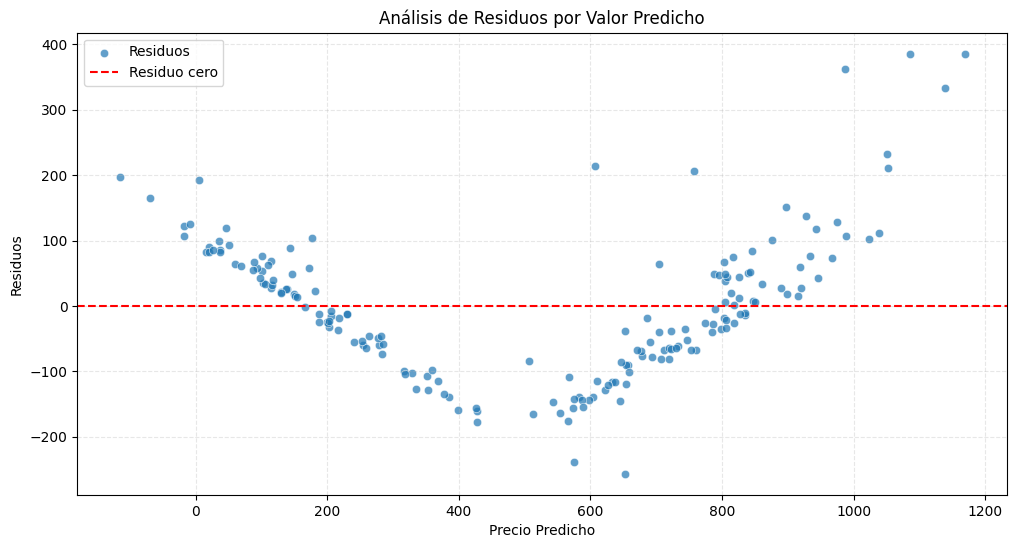

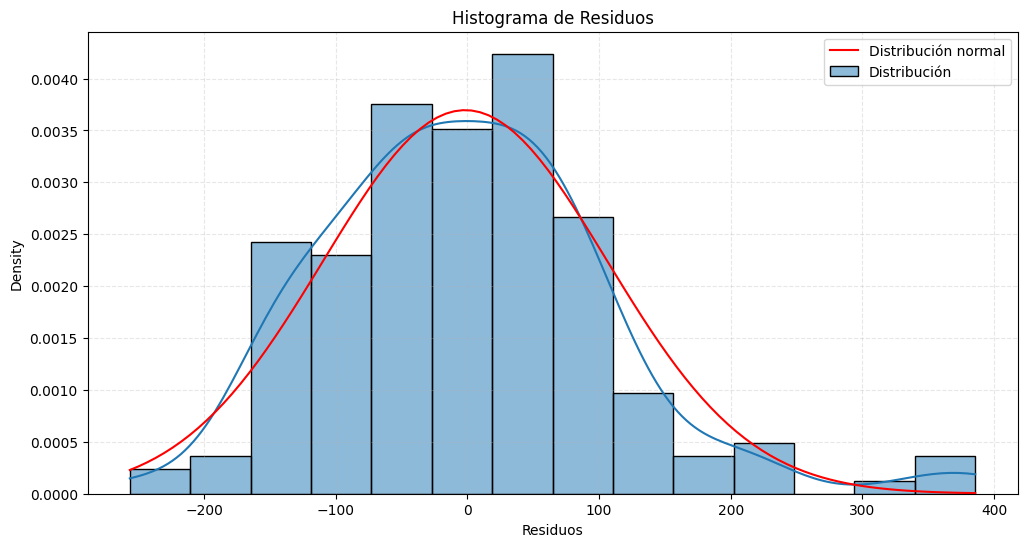

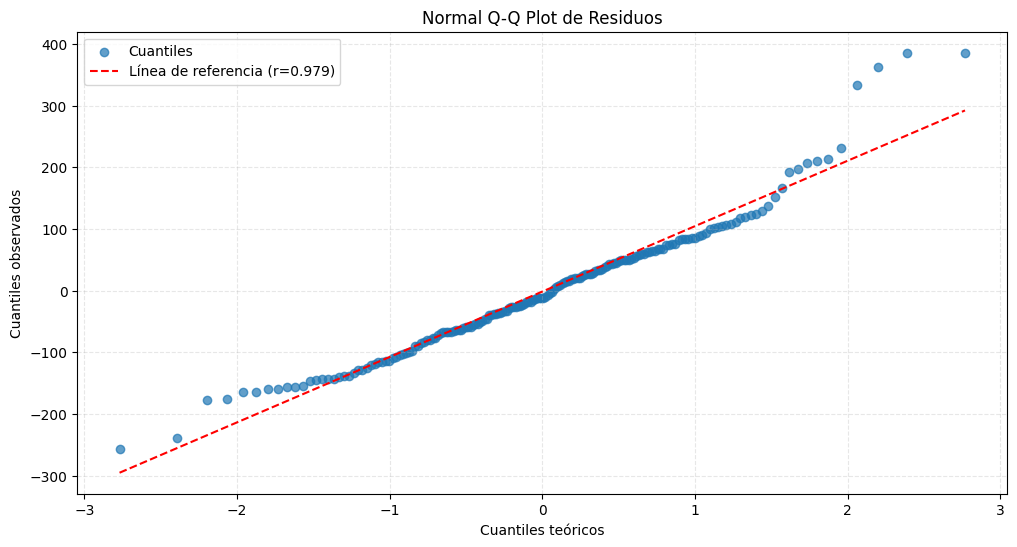

In [15]:
from utils.visuals import visualize_regression_results

custom_titles = {
    "scatter": "Comparación: Valores Reales vs Predicciones",
    "residuals": "Análisis de Residuos por Valor Predicho",
    "distribution": "Histograma de Residuos"
}

figures = visualize_regression_results(
    results_gd_linear_all['y_test'],
    results_gd_linear_all['y_pred_test'],
    transform_func=None,
    fig_size=(12, 6),
    titles=custom_titles,
    show_figures=True,
    fit_degree=1
)





Mismo análisis que el anterior.

### Probamos que el modelo con 1 feature funciona bien


Pseudo Inversa

In [16]:
from utils.model import train_and_evaluate_model

results_linear_psinv_area = train_and_evaluate_model( 
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["area"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae']
)

model_linear_psinv_area = results_linear_psinv_area["model"]


=== Model Evaluation (LinearRegressor) - Metrics   Space: original===
MSE: 102728.297632
R2: 0.158327
Método: pseudo_inverse
Intercept: 75.5102

Coeficientes:
------------------------------
area            | +4.0167


Gradient descent


In [17]:
from utils.model import train_and_evaluate_model

results_gd_linear_area = train_and_evaluate_model( 
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    feature_columns = ["area"],
    normalize_features=True,
    fit_params={'method': 'gradient_descent',
                "epochs": 1000,
                "learning_rate":0.01
                },
    metrics=['mse', 'r2', 'mae'],
    verbose=True
)

model_gd_linear_area = results_gd_linear_area["model"]

results_gd_linear_area["normalization_params"]



=== Model Evaluation (LinearRegressor) - Metrics   Space: original===
MSE: 102728.866581
R2: 0.158322
Método: gradient_descent
Intercept: 455.7119

Coeficientes:
------------------------------
area            | +123.4822
Convergencia: Sí
Iteraciones: 569/1000


{'mean': area    94.657096
 dtype: float64,
 'std': area    30.742739
 dtype: float64}

# Punto 3

## Punto 3.1

In [18]:
from utils.model import train_and_evaluate_model

df = pd.read_csv(r"../data/processed/casas_dev.csv")
df = df[df["is_house"] == 1]

results_area = train_and_evaluate_model( 
    df = df,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["area"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae'],
    verbose=False
)

model_area = results_area["model"]



### Punto 3.2

#### preparamos el set de Amanda

In [19]:
import pandas as pd

df_amanda = pd.read_csv(r"../vivienda_Amanda.csv")

df_amanda.loc[df_amanda['area_units'] == 'sqft', 'area'] = df_amanda['area'] * 0.092903
df_amanda['area_units'] = 'm2'  

df_amanda = df_amanda.drop('area_units', axis=1)



In [20]:
from utils.model import train_and_evaluate_model
from models.regression.linear_regressor import LinearRegressor

results_amanda = train_and_evaluate_model( 
    data_path=r"../data/processed/casas_dev.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    transform_target=None,
    model_class=LinearRegressor,
    normalize_features=False,
    fit_params={'method': "pseudo_inverse",
                "loss": "mse"},
    metrics=['mse', 'r2', 'mae']
)

model_amanda = results_amanda["model"]



=== Model Evaluation (LinearRegressor) - Metrics   Space: original===
MSE: 11630.160150
R2: 0.904712
Método: pseudo_inverse
Intercept: 3677.5350

Coeficientes:
------------------------------
area            | +4.9952
is_house        | +75.3474
has_pool        | +43.4141
age             | -3.4354
lat             | +19.9893
lon             | +56.3301
rooms           | -3.9214


In [21]:
y_pred = model_linear_psinv_all.predict(df_amanda)

print(f"Valor estimado de la vivienda de Amanda: {y_pred[0]:.2f}")

Valor estimado de la vivienda de Amanda: 791.19


### Punto 3.3

3.3) En el dataset, ¿cuál es el valor promedio por metro cuadrado de una casa

In [22]:

area_cof = model_area.get_coef_dict()["area"]

print(f"El valor promedio por metro cuadrado de una casa es: {area_cof:.2f}")

El valor promedio por metro cuadrado de una casa es: 3.64


### Punto 3.4

Benito está evaluando la posibilidad de construir una pileta. ¿Cómo afectaría la construcción de una pileta al precio de su propiedad? Explique cómo llegó a este resultado.

In [23]:
# Analizamos el precio promedio de las propiedades con y sin pileta
df = pd.read_csv(r"../data/processed/casas_dev.csv")    

precios = df.groupby('has_pool')['price'].mean()
print(precios)


has_pool
0    478.831169
1    391.369231
Name: price, dtype: float64


In [24]:
from utils.model import train_and_evaluate_model

df_pool_house = pd.read_csv(r"../data/processed/casas_dev.csv")
df_pool_house = df_pool_house[df_pool_house["is_house"] == 1]

results_pool_house = train_and_evaluate_model( 
    df = df_pool_house,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["has_pool","area","age","rooms","lat","lon"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae'],
    verbose=False
)

model_pool_house = results_pool_house["model"]


house_pool_cof = model_pool_house.get_coef_dict()["has_pool"]



In [25]:
from utils.model import train_and_evaluate_model

df_pool_dept = pd.read_csv(r"../data/processed/casas_dev.csv")
df_pool_dept = df_pool_dept[df_pool_dept["is_house"] == 0]

results_pool_dept = train_and_evaluate_model( 
    df = df_pool_dept,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["has_pool","area","age","rooms","lat","lon"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae'],
    verbose=False
)

model_pool_dept = results_pool_dept["model"]


dept_pool_cof = model_pool_dept.get_coef_dict()["has_pool"]




In [26]:
from utils.model import train_and_evaluate_model

df_pool = pd.read_csv(r"../data/processed/casas_dev.csv")

results_pool_combined = train_and_evaluate_model( 
    df = df_pool,
    target_column="price",
    test_size=0.20,
    random_state=12,
    feature_columns = ["has_pool","area","age","rooms","lat","lon"],
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae'],
    verbose=False
)

model_pool_combined = results_pool_combined["model"]


dept_pool_cof = model_pool_combined.get_coef_dict()["has_pool"]



In [27]:
from utils.visuals import compare_feature_impact

model_results = {
    "Departamentos": results_pool_dept,
    "Casas": results_pool_house,
    "Combinado": results_pool_combined
}

property_data = {
    "Departamentos": df_pool_dept,
    "Casas": df_pool_house,
    "Combinado": df_pool
}

impacts = compare_feature_impact(
    model_results_dict=model_results,
    property_dfs=property_data,
    feature_name='has_pool'
)

for model_name, impact_data in impacts.items():
    display_name = impact_data["display_name"]
    feature_impact = impact_data["absolute_impact"]
    avg_property_price = impact_data["average_price"]
    percentage_impact = impact_data["percentage_impact"]
    
    print(f"\nImpacto de agregar {display_name} para {model_name}:")
    print(f"- Valor absoluto agregado: ${feature_impact:.2f}")
    print(f"- Precio promedio de la propiedad: ${avg_property_price:.2f}")
    print(f"- Incremento porcentual sobre el promedio: {percentage_impact:.2f}%")


Impacto de agregar Pool para Departamentos:
- Valor absoluto agregado: $52.68
- Precio promedio de la propiedad: $554.10
- Incremento porcentual sobre el promedio: 9.51%

Impacto de agregar Pool para Casas:
- Valor absoluto agregado: $13.82
- Precio promedio de la propiedad: $344.26
- Incremento porcentual sobre el promedio: 4.01%

Impacto de agregar Pool para Combinado:
- Valor absoluto agregado: $45.13
- Precio promedio de la propiedad: $466.20
- Incremento porcentual sobre el promedio: 9.68%


La construcción de una pileta, según el análisis realizado, podría incrementar el valor de la propiedad en distintos porcentajes: en departamentos se observó un aumento promedio de USD 52.68 (9.51% sobre un precio promedio de USD 554.10), en casas un incremento de USD 13.82 (4.01% sobre USD 344.26) y, considerando un análisis combinado, un aumento de USD 45.13 (9.68% sobre USD 466.20); estos resultados se obtuvieron al “activar” la variable de pileta en el modelo y medir la diferencia en la predicción del precio, lo que aísla el impacto de esta amenidad, y es posible que la mayor apreciación en departamentos se deba a que, en contextos donde la oferta de amenities es más limitada o exclusiva, la incorporación de una pileta se perciba como un valor añadido significativamente mayor, mientras que en casas, donde las opciones de espacio y personalización son más amplias, el impacto relativo resulta menor.

# Punto 4

#### Observamos si nuestros datos se pueden agrupar por zonas geográficas

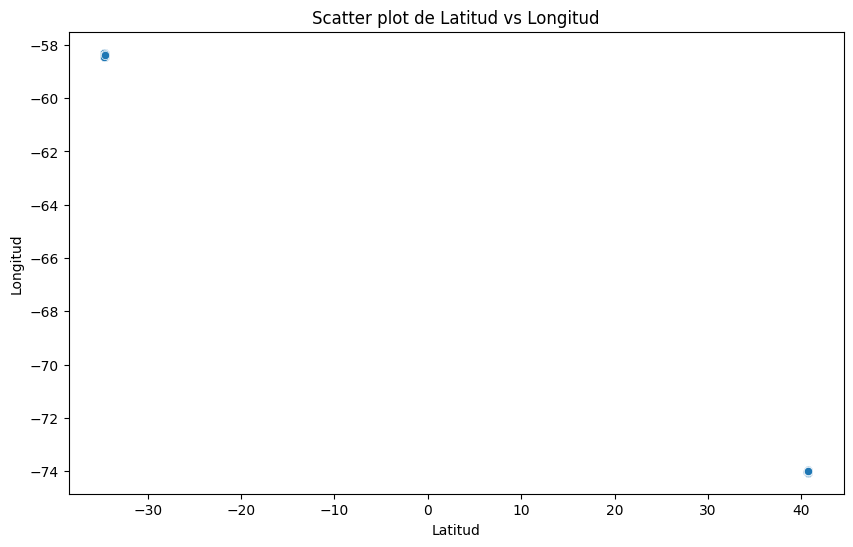

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lat', y='lon')
plt.title('Scatter plot de Latitud vs Longitud')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()

Notamos una clara agrupación por zonas geográficas.
#### Aplicamos KMeans para agrupar por zonas y realizamos feature engineering

In [29]:
from models.clustering.kmeans import KMeans
from utils.data import process_dataset

df = pd.read_csv(r"../data/processed/casas_dev.csv")


feature_ops = [
    {
        'name': 'area_per_room',
        'operation': lambda df: df['area'] / df['rooms']
    },
    {
        'name': 'pool_house',
        'operation': lambda df: df['has_pool'] * df['is_house']
    },
    {
        'name': 'house_area',
        'operation': lambda df: df['area'] * df['is_house']
    }
]

kmeans = KMeans(n_clusters=2)
results = process_dataset(
    df=df,
    kmeans_model=kmeans,
    feature_engineering_ops=feature_ops,
    features_to_impute=['age', 'rooms'],
    save_path=r"../data/processed/casas_dev_eng.csv"
)


processed_df = results['df']
location_data = results['df_pos']
zone_statistics = results['zone_stats']
feature_statistics = results['feature_stats']

processed_df.head()


,area,is_house,has_pool,age,price,rooms,location_zone,area_per_room,pool_house,house_area
0,58.993405,1,0,18.0,546.0,2.0,0,29.496703,0,58.993405
1,102.007494,0,0,9.0,759.0,3.0,0,34.002498,0,0.000000
2,61.966301,0,0,7.0,464.0,2.0,0,30.983151,0,0.000000
3,127.000000,1,1,16.0,251.0,4.0,1,31.750000,1,127.000000
4,128.020334,0,0,8.0,963.0,4.0,0,32.005083,0,0.000000


In [30]:
import pandas as pd

# Cargar el dataset
df_raw = pd.read_csv(r"../data/raw/casas_dev.csv")

# Preprocesamiento: convertir área de sqft a m2 y asignar zonas (se asume que 'kmeans' ya está definido)
df_raw.loc[df_raw['area_units'] == 'sqft', 'area'] = df_raw['area'] * 0.092903
df_raw.loc[df_raw['area_units'] == 'sqft', 'area_units'] = 'm2'
df_raw['location_zone'] = kmeans.predict(df_raw[['lat', 'lon']].to_numpy())

# Guardar las filas que tienen NaN en 'rooms' o 'age' antes de imputar
nan_rows_before = df_raw[df_raw[['rooms', 'age']].isna().any(axis=1)].copy()
print("Filas con NaN antes de imputar:")
print(nan_rows_before[['location_zone', 'rooms', 'age']])

# Calcular las medias por zona y redondearlas al entero más cercano
mean_rooms_by_zone = df_raw.groupby('location_zone')['rooms'].mean().round(0).astype(int)
mean_age_by_zone = df_raw.groupby('location_zone')['age'].mean().round(0).astype(int)

# Imputar los valores faltantes usando las medias correspondientes por zona
for zone in df_raw['location_zone'].unique():
    df_raw.loc[(df_raw['location_zone'] == zone) & (df_raw['rooms'].isna()), 'rooms'] = mean_rooms_by_zone[zone]
    df_raw.loc[(df_raw['location_zone'] == zone) & (df_raw['age'].isna()), 'age'] = mean_age_by_zone[zone]

# Mostrar las mismas filas (utilizando sus índices) después de la imputación
nan_rows_after = df_raw.loc[nan_rows_before.index]
print("\nFilas correspondientes después de imputar:")
print(nan_rows_after[['location_zone', 'rooms', 'age']])


# Crear nuevas features y eliminar columna innecesaria
df_raw['area_per_room'] = df_raw['area'] / df_raw['rooms']
df_raw['pool_house'] = df_raw['has_pool'] * df_raw['is_house']
df_raw = df_raw.drop('area_units', axis=1)


# save the df_raw
df_raw.to_csv(r"../data/processed/casas_dev_eng_mean_impute.csv", index=False)

df_raw.sample(10)

Filas con NaN antes de imputar:
     location_zone  rooms   age
33               1    4.0   NaN
34               0    3.0   NaN
37               0    NaN   7.0
42               1    NaN  17.0
44               0    1.0   NaN
..             ...    ...   ...
874              1    3.0   NaN
877              0    NaN  15.0
883              0    3.0   NaN
895              0    NaN   NaN
896              0    3.0   NaN

[189 rows x 3 columns]

Filas correspondientes después de imputar:
     location_zone  rooms   age
33               1    4.0  11.0
34               0    3.0   9.0
37               0    3.0   7.0
42               1    3.0  17.0
44               0    1.0   9.0
..             ...    ...   ...
874              1    3.0  11.0
877              0    3.0  15.0
883              0    3.0   9.0
895              0    3.0   9.0
896              0    3.0   9.0

[189 rows x 3 columns]


,area,is_house,has_pool,age,price,lat,lon,rooms,location_zone,area_per_room,pool_house
403,153.000000,1,1,16.0,294.0,-34.540607,-58.392469,4.0,1,38.250000,1
616,108.975219,0,0,13.0,805.0,40.698022,-74.015122,3.0,0,36.325073,0
135,78.038520,1,1,7.0,816.0,40.711286,-74.033950,2.0,0,39.019260,1
408,99.034598,1,0,16.0,914.0,40.709574,-73.964019,3.0,0,33.011533,0
592,52.954710,0,0,4.0,436.0,40.719796,-74.009850,2.0,0,26.477355,0
205,201.042092,0,0,7.0,1584.0,40.719021,-74.000627,5.0,0,40.208418,0
289,114.000000,0,0,7.0,199.0,-34.579215,-58.389262,3.0,1,38.000000,0
642,100.000000,0,1,8.0,179.0,-34.589132,-58.327051,3.0,1,33.333333,0
756,121.981639,0,0,4.0,1220.0,40.711074,-74.005307,4.0,0,30.495410,0
878,150.000000,1,0,16.0,368.0,-34.598915,-58.385283,4.0,1,37.500000,0


Al utilizar estas features, logramos crear clusters que nos permiten agrupar las propiedades por zonas geográficas, y además podemos capturar relaciones entre variables las features que el modelo lineal solo no podría. 

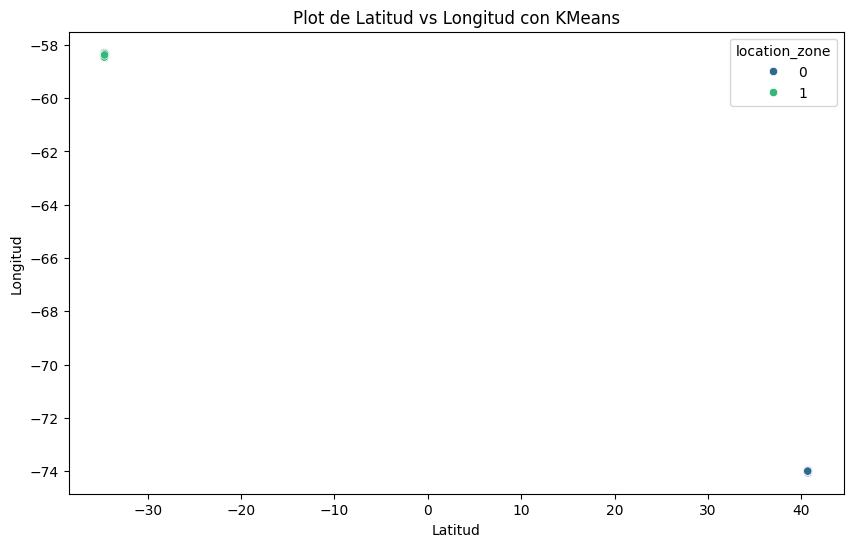

In [31]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=location_data, x='lat', y='lon', hue='location_zone', palette='viridis')
plt.title('Plot de Latitud vs Longitud con KMeans')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()


## Punto 4.2

In [32]:
import numpy as np

df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")
df_imputed = pd.read_csv(r"../data/processed/casas_dev_eng_mean_impute.csv")
results_engineering = train_and_evaluate_model(
    df=df, 
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=np.log,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae'],
    verbose=False
)

model_engineering = results_engineering["model"]


mse_first_model = results_linear_psinv_all["mse"] 
r2_first_model = results_linear_psinv_all["r2"]

mse_engineering = results_engineering["mse"]
r2_engineering = results_engineering["r2"]

# calcular cuanto mejor es el modelo con feature engineering porcentualmente comparado al primer modelo lineal 

improvement_mse = ((mse_first_model - mse_engineering) / mse_first_model) * 100
improvement_r2 = ((r2_engineering - r2_first_model) / r2_first_model) * 100

print(f"El modelo con feature engineering tiene un mejor desempeño en términos de MSE en un {improvement_mse:.4f}%.")
print(f"El modelo con feature engineering tiene un mejor desempeño en términos de R2 en un {improvement_r2:.4f}%.\n")

# mostrar las metricas de ambos modelos

print(f"MSE del primer modelo: {mse_first_model:.4f}")
print(f"R2 del primer modelo: {r2_first_model:.4f}\n")

print(f"MSE del modelo con feature engineering: {mse_engineering:.4f}")
print(f"R2 del modelo con feature engineering: {r2_engineering:.4f}")


El modelo con feature engineering tiene un mejor desempeño en términos de MSE en un 99.9999%.
El modelo con feature engineering tiene un mejor desempeño en términos de R2 en un 8.1844%.

MSE del primer modelo: 11630.1602
R2 del primer modelo: 0.9047

MSE del modelo con feature engineering: 0.0128
R2 del modelo con feature engineering: 0.9788


Observamos que, a comparación del primer modelo lineal entrenado, el modelo utilizando feature engineering tiene un mejor desempeño tanto en términos de MSE como de R2.

Cabe destacar que tomamos el logaritmo de la variable objetivo para que el modelo se ajuste mejor a los datos. Esto sirve ... y se justifica ...

Volviendo al inciso 1, donde mencionabamos que el modelo lineal no era capaz de capturar relaciones y presentaba heterocedasticidad, ahora podemos probar que sucede si aumentamos el grado de la regresión polinómica, y usamos las nuevas features que creamos.

In [33]:
from utils.model import train_and_evaluate_model
from models.regression.polynomial_regressor import PolynomialRegressor

results_polynomial = train_and_evaluate_model(
    data_path=r"../data/processed/casas_dev_eng.csv",
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=PolynomialRegressor.change_degree(4),
    transform_target=np.log,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae'],
    verbose=True
)

# transormar errores a espacio original

mse_polynomial = results_polynomial["mse"]
r2_polynomial = results_polynomial["r2"]

# sacar escala logaritmica
mse_polynomial = np.exp(mse_polynomial)


print(f"MSE del modelo polinómico: {mse_polynomial:.4f}")
print(f"R2 del modelo polinómico: {r2_polynomial:.4f}")

model_polynomial = results_polynomial["model"]

print(results_polynomial['r2'])


=== Model Evaluation (PolynomialRegressor) - Metrics   Space: log===
MSE: 0.009978
R2: 0.983441
Método: pseudo_inverse
Intercept: -3.2020

Coeficientes:
------------------------------
area            | -0.0669
is_house        | +0.2811
has_pool        | +0.0279
age             | +0.0028
rooms           | +4.3236
location_zone   | -0.3708
area_per_room   | +0.4698
pool_house      | -0.0013
house_area      | -0.0373
area^2          | +0.0004
is_house^2      | +0.2811
has_pool^2      | +0.0279
age^2           | -0.0013
rooms^2         | -1.0340
location_zone^2 | -0.3708
area_per_room^2 | -0.0124
pool_house^2    | -0.0013
house_area^2    | +0.0005
area^3          | -0.0000
is_house^3      | +0.2811
has_pool^3      | +0.0279
age^3           | +0.0000
rooms^3         | +0.1243
location_zone^3 | -0.3708
area_per_room^3 | +0.0002
pool_house^3    | -0.0013
house_area^3    | -0.0000
area^4          | +0.0000
is_house^4      | +0.2811
has_pool^4      | +0.0279
age^4           | +0.0000
rooms^4  

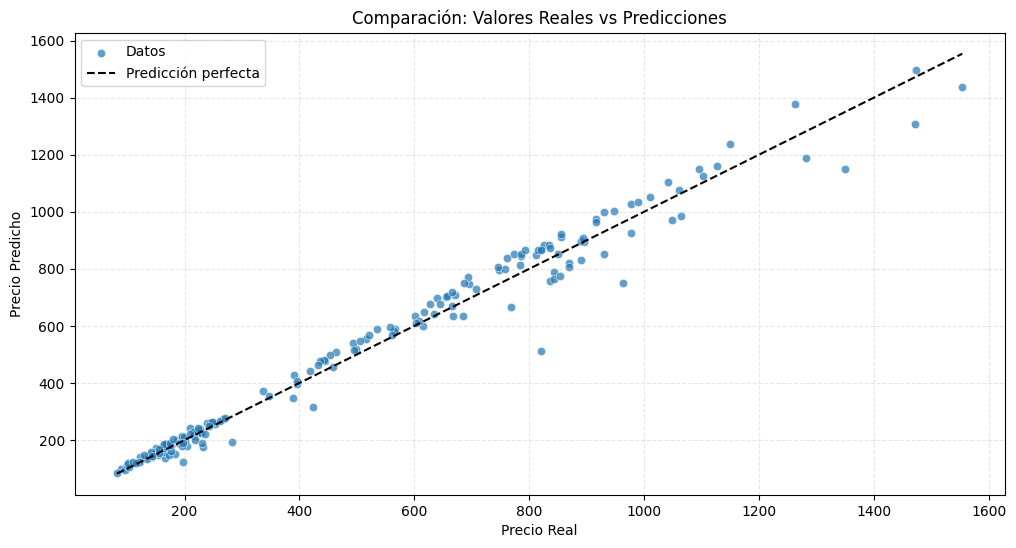

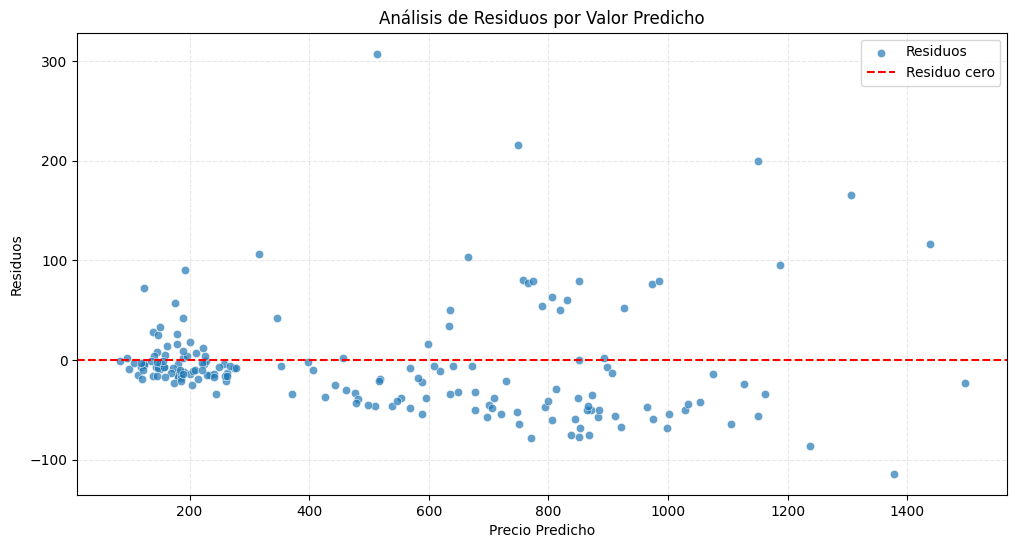

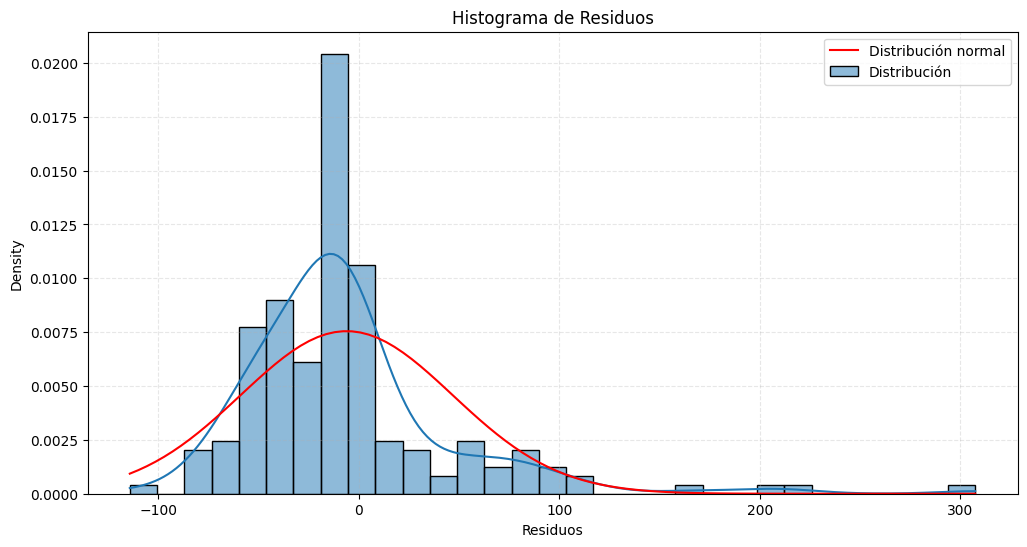

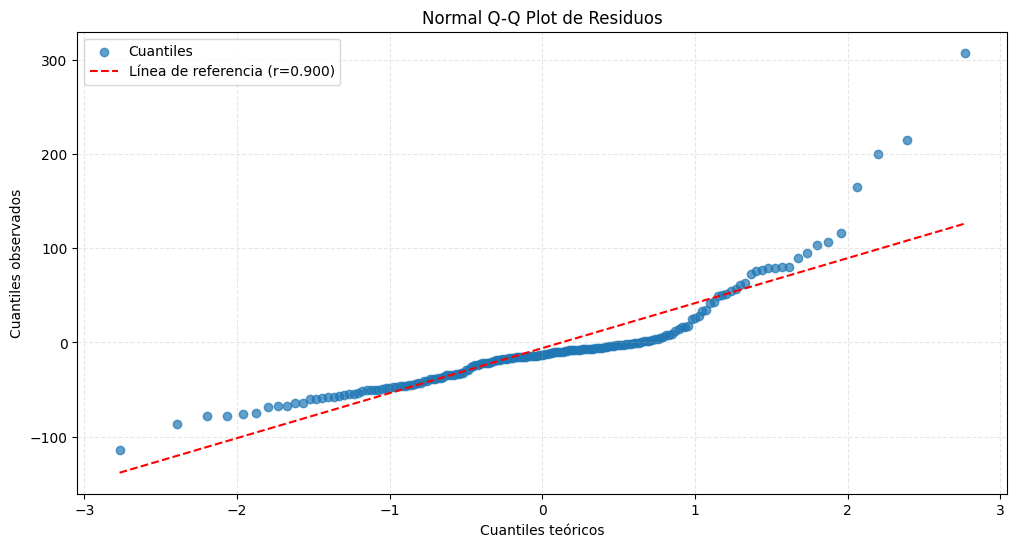

In [34]:
figures_engineering = visualize_regression_results(
    results_polynomial['y_test'],
    results_polynomial['y_pred_test'],
    transform_func=np.exp,
    fig_size=(12, 6),
    titles=custom_titles,
    show_figures=True,
    fit_degree=1
)

Vemos como el modelo polinómico con grado 3 tiene un mejor ajuste que el modelo lineal, y que el modelo con feature engineering.
Se observa, en el Q-Q plot, dos "colas" 

En el grafico de la distirbucion de residuos, observamos que el modelo polinómico tiene una distribución normal con una 'cola' más larga que el modelo lineal, lo que sugiere que el modelo polinómico tiene más errores grandes que el modelo lineal (INTICION, NO SE SI ES ASI).

### Punto 4.3

In [35]:
df = pd.read_csv(r"../data/processed/casas_dev.csv")

df_numeric = df.select_dtypes(include=['float64', 'int64']).columns

feature_ops = []
features_count = 0
powers = range(1, 40)  

for col in df_numeric:
    for power in powers:
        if features_count >= 300:
            break
            
        feature_ops.append({
            'name': f'{col}_power_{power}',
            'operation': lambda df, col=col, power=power: df[col] ** power
        })
        features_count += 1
        
    if features_count >= 300:
        break

# kmeans = KMeans(n_clusters=2)
results = process_dataset(
    df=df,
    kmeans_model=kmeans,
    feature_engineering_ops=feature_ops,
    location_columns=None,
    features_to_impute=['age', 'rooms']
    )

processed_df = results['df']

processed_df.head()

,area,is_house,has_pool,age,price,lat,lon,rooms,area_power_1,area_power_2,...,rooms_power_18,rooms_power_19,rooms_power_20,rooms_power_21,rooms_power_22,rooms_power_23,rooms_power_24,rooms_power_25,rooms_power_26,rooms_power_27
0,58.993405,1,0,18.0,546.0,40.679064,-74.007844,2.0,58.993405,3480.221833,...,2.621440e+05,5.242880e+05,1.048576e+06,2.097152e+06,4.194304e+06,8.388608e+06,1.677722e+07,3.355443e+07,6.710886e+07,1.342177e+08
1,102.007494,0,0,9.0,759.0,40.712839,-73.967750,3.0,102.007494,10405.528832,...,3.874205e+08,1.162261e+09,3.486784e+09,1.046035e+10,3.138106e+10,9.414318e+10,2.824295e+11,8.472886e+11,2.541866e+12,7.625597e+12
2,61.966301,0,0,7.0,464.0,40.669863,-74.029414,2.0,61.966301,3839.822460,...,2.621440e+05,5.242880e+05,1.048576e+06,2.097152e+06,4.194304e+06,8.388608e+06,1.677722e+07,3.355443e+07,6.710886e+07,1.342177e+08
3,127.000000,1,1,16.0,251.0,-34.600437,-58.415266,4.0,127.000000,16129.000000,...,6.871948e+10,2.748779e+11,1.099512e+12,4.398047e+12,1.759219e+13,7.036874e+13,2.814750e+14,1.125900e+15,4.503600e+15,1.801440e+16
4,128.020334,0,0,8.0,963.0,40.722322,-73.983229,4.0,128.020334,16389.205917,...,6.871948e+10,2.748779e+11,1.099512e+12,4.398047e+12,1.759219e+13,7.036874e+13,2.814750e+14,1.125900e+15,4.503600e+15,1.801440e+16


In [36]:

results_300 = train_and_evaluate_model(
    df=processed_df, 
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=np.log,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse'},
    metrics=['mse', 'r2', 'mae'],
    verbose=False
)

mse_300 = results_300["mse"]
r2_300 = results_300["r2"]
mae_300 = results_300["mae"]

print(f"Mean Squared Error: {mse_300:.2f}")
print(f"R2 Score: {r2_300:.2f}")
print(f"Mean Absolute Error: {mae_300:.2f}")

KeyError: 'mae'

Se esperaba que la incorporación masiva de 300 features, generadas como potencias de las variables numéricas originales, empeorara drásticamente el desempeño del modelo. En lugar de aportar información útil, estas transformaciones generan variables altamente correlacionadas y redundantes, lo que conduce a sobreajuste, inestabilidad numérica y problemas de interpretación, haciendo que el modelo ande mal. Los resultados—con un MSE de 35.77, un R² de -58.37 y un MAE de 5.93—confirman que esta estrategia no tiene sentido, ya que agranda la dimensión del problema sin aportar mejoras predictivas, sino que, por el contrario, deteriora significativamente la calidad del modelo.

# Punto 5


## Punto 5.1 - 5.3

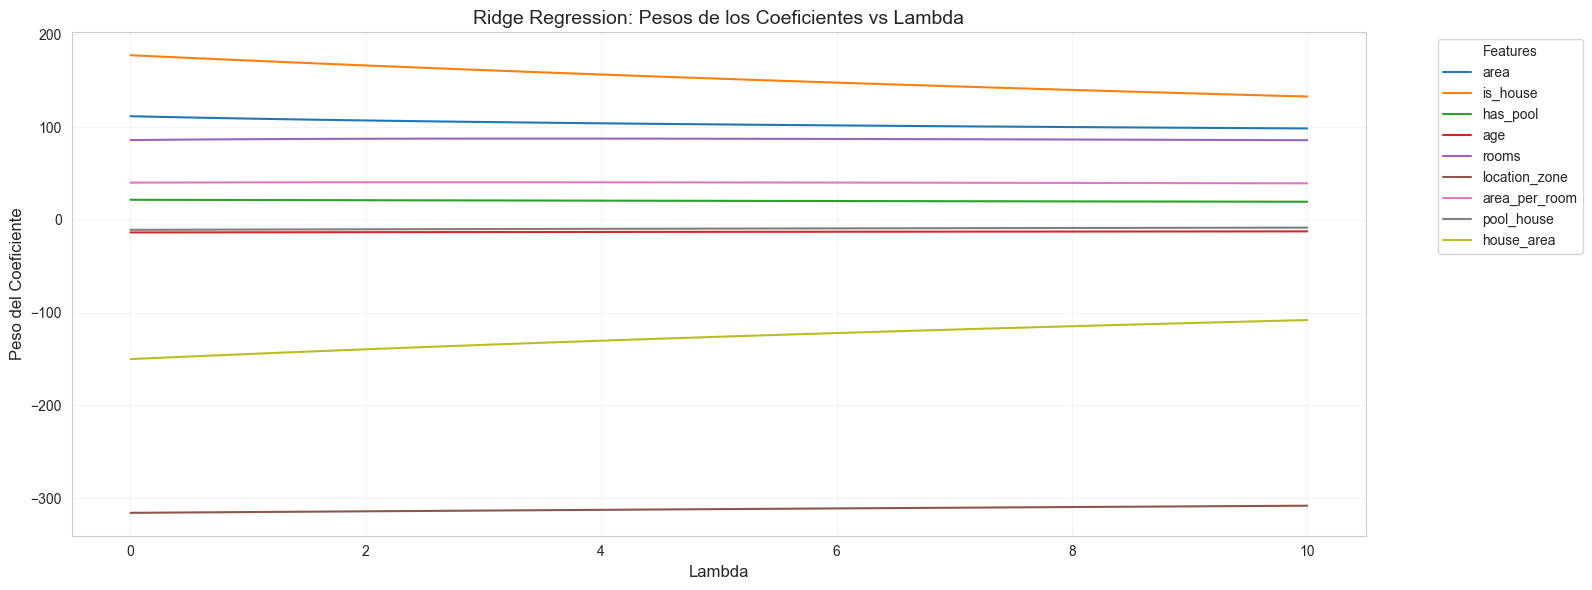

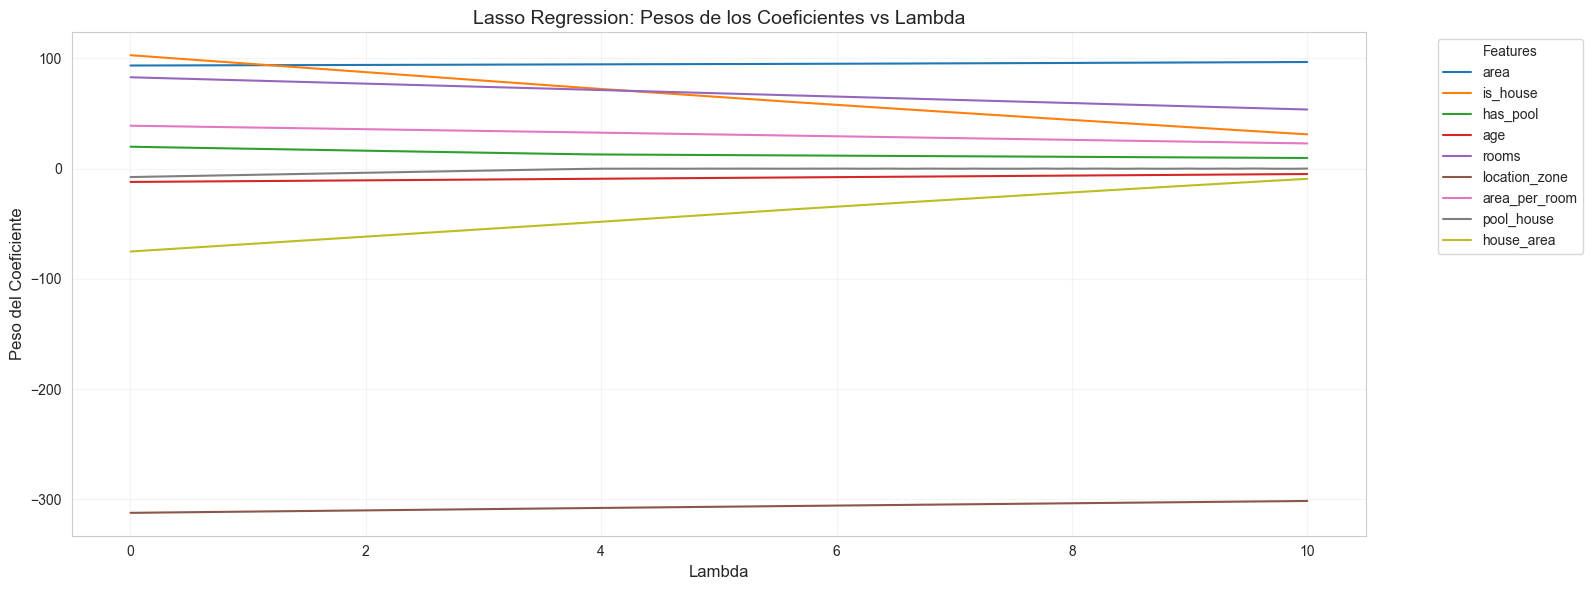

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.regression.linear_regressor import LinearRegressor
from utils.model import get_weights_and_metrics
from utils.visuals import plot_weights_vs_lambda, plot_performance_metrics


df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")

X = df.drop('price', axis=1)
y = df['price']


lambdas = np.linspace(0, 10, 100)


weights_ridge, mse_scores_ridge, r2_scores_ridge = get_weights_and_metrics(X, y, lambdas, LinearRegressor, normalize=True, method='pseudo_inverse', regularization='l2',random_state=12)
weights_lasso, mse_scores_lasso, r2_scores_lasso = get_weights_and_metrics(X, y, lambdas, LinearRegressor, normalize=True, method='gradient_descent', regularization='l1',random_state=12)

feature_names = X.columns


plot_weights_vs_lambda(lambdas, weights_ridge, feature_names,custom_titles={"title": "Ridge Regression: Pesos de los Coeficientes vs Lambda", "xlabel": "Lambda", "ylabel": "Peso del Coeficiente"})
plot_weights_vs_lambda(lambdas, weights_lasso, feature_names,custom_titles={"title": "Lasso Regression: Pesos de los Coeficientes vs Lambda", "xlabel": "Lambda", "ylabel": "Peso del Coeficiente"})




El uso de regularización L1 (Lasso) y L2 (Ridge) tiene efectos distintos en los coeficientes del modelo: Lasso tiende a llevar varios coeficientes exactamente a cero, lo que implica una selección de variables automática y favorece la interpretabilidad del modelo, mientras que Ridge reduce gradualmente la magnitud de todos los coeficientes sin anularlos, distribuyendo el peso entre las variables y haciendo el modelo más estable cuando hay colinealidad. Así, Lasso es útil cuando se busca un modelo más simple y con menos variables relevantes, mientras que Ridge es preferible cuando todas las variables contienen información importante y se quiere evitar sobreajuste sin eliminar ninguna.

## Punto 5.4

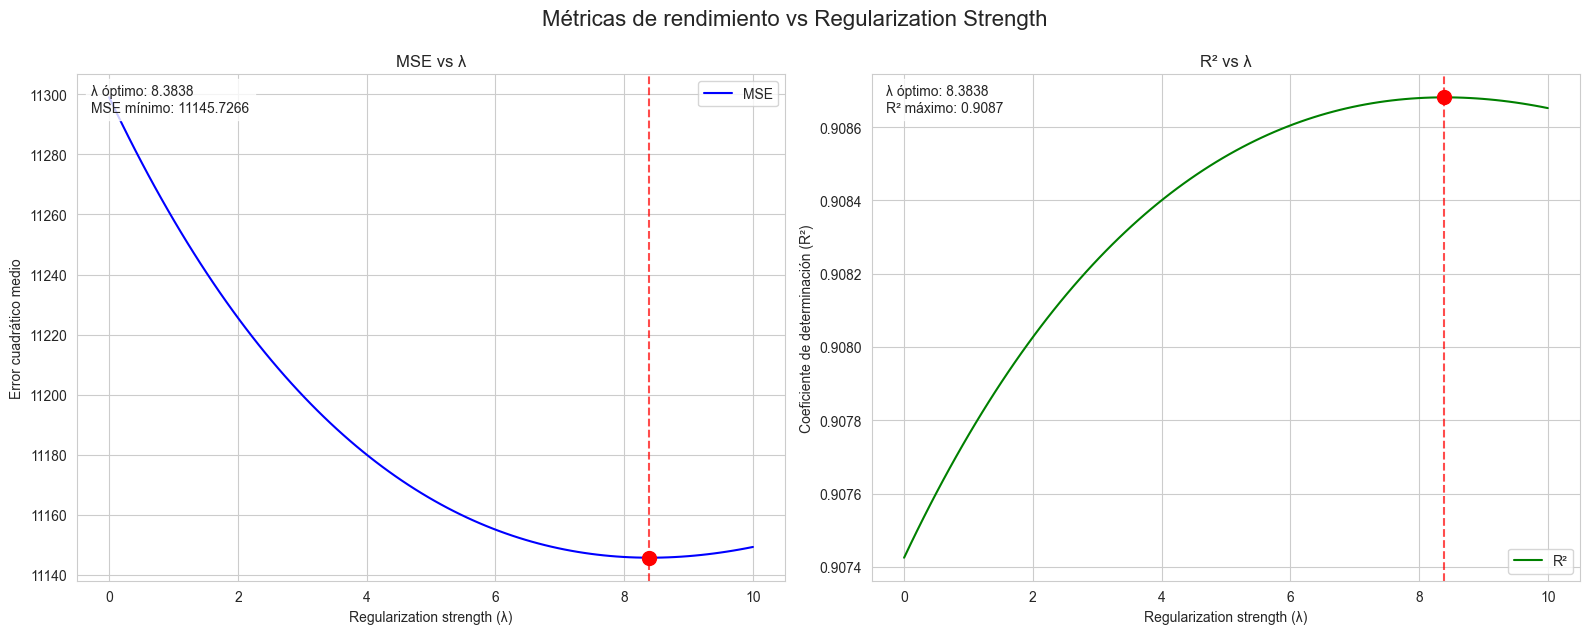

In [850]:
# El mínimo/máximo es el mismo lambda porque...
min_lambda_ridge, min_mse_ridge, max_lambda_ridge, max_r2_ridge = plot_performance_metrics(lambdas, mse_scores_ridge, r2_scores_ridge)


In [851]:
from utils.model import train_and_evaluate_model

df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")    

results_ridge = train_and_evaluate_model(
    df = df,
    target_column="price",
    test_size=0.20,
    random_state=12,
    model_class=LinearRegressor,
    transform_target=None,
    normalize_features=False,
    fit_params={'method': 'pseudo_inverse',
                'alpha': min_lambda_ridge,
                'regularization': 'l2'
                },
    metrics=['mse', 'r2', 'mae']
    )




=== Model Evaluation (LinearRegressor) ===
MSE: 11664.257232
R2: 0.904432
MAE: 74.616519
Método: ridge_analytical
Intercept: 56.0858

Coeficientes:
------------------------------
area            | +4.1091
is_house        | +218.5085
has_pool        | +39.9333
age             | -2.4325
rooms           | +56.9265
location_zone   | -587.8357
area_per_room   | +4.7808
pool_house      | -12.4254
house_area      | -1.8217


## Punto 5.6

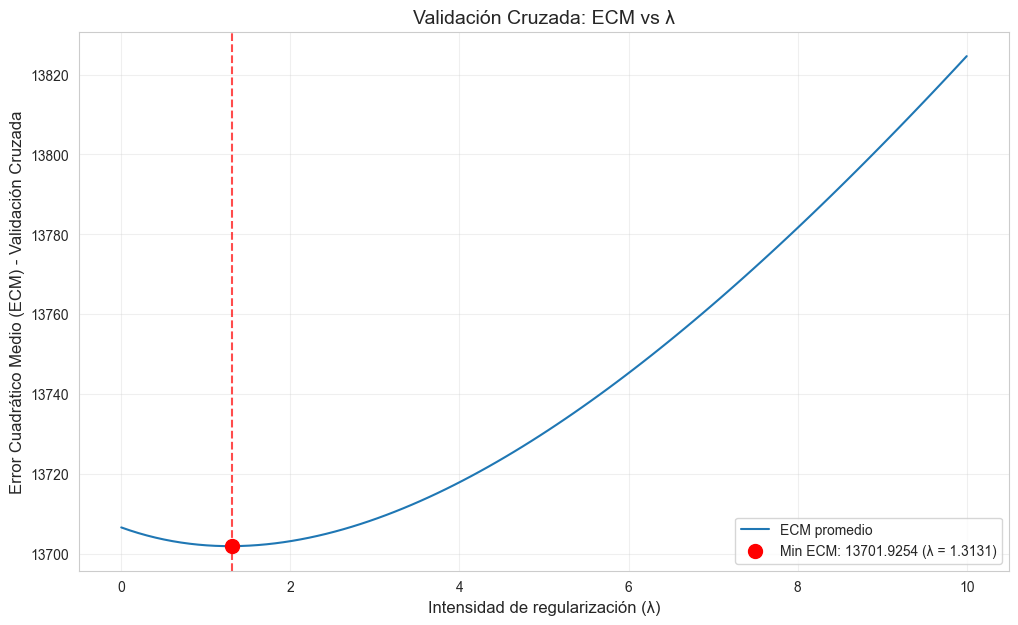

In [852]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.data import cross_validate_lambda
from utils.visuals import plot_cv_results
    
df = pd.read_csv(r"../data/processed/casas_dev_eng.csv")
y = df['price']
X = df.drop(columns=['price'])

lambdas = np.linspace(0, 10, 100)

optimal_lambda, min_cv_mse, cv_mse_scores = cross_validate_lambda(
    X, y, lambdas, LinearRegressor, n_splits=10, method='pseudo_inverse', 
    regularization='l2', normalize=True, random_state=12
)

ax = plot_cv_results(lambdas, cv_mse_scores, optimal_lambda, min_cv_mse, 
                        title="Validación Cruzada: ECM vs λ")
plt.show()

# FINAL

In [853]:
df = pd.read_csv(r"../data/raw/casas_test.csv")

df.isna().sum()

area           0
area_units     0
is_house       0
has_pool       0
age           16
price          0
lat            0
lon            0
rooms          4
dtype: int64

In [854]:
# Load the test data
df = pd.read_csv(r"../data/raw/casas_test.csv")

# Apply the same preprocessing steps
df.loc[df['area_units'] == 'sqft', 'area'] = df['area'] * 0.092903
df.loc[df['area_units'] == 'sqft', 'area_units'] = 'm2'
df['location_zone'] = kmeans.predict(df[['lat', 'lon']].to_numpy())

df['area_per_room'] = df['area'] / df['rooms']
df['pool_house'] = df['has_pool'] * df['is_house']

df = df.drop('area_units', axis=1)

# Save the processed test data
df.to_csv(r"../data/processed/casas_test.csv", index=False)


In [855]:
#insertar la media de age y rooms dependiendo de location zone (0 y 1)
df = pd.read_csv(r"../data/processed/casas_test.csv")

df_0 = df[df['location_zone'] == 0]
df_1 = df[df['location_zone'] == 1]


mean_age_0 = df_0['age'].mean()
mean_rooms_0 = df_0['rooms'].mean()

mean_age_1 = df_1['age'].mean()
mean_rooms_1 = df_1['rooms'].mean()

df.loc[df['location_zone'] == 0, 'age'] = df['age'].fillna(mean_age_0)
df.loc[df['location_zone'] == 0, 'rooms'] = df['rooms'].fillna(mean_rooms_0)

df.loc[df['location_zone'] == 1, 'age'] = df['age'].fillna(mean_age_1)
df.loc[df['location_zone'] == 1, 'rooms'] = df['rooms'].fillna(mean_rooms_1)

df = df.drop(['lat', 'lon'], axis=1)

df.to_csv(r"../data/processed/casas_test.csv", index=False)

In [856]:
X_test = df.drop('price', axis=1)


# Get the target variable
y_test = df['price']

# Apply log transformation to match training
y_test = np.log(y_test)

# Make predictions
y_pred_test = model_engineering.predict(X_test)
y_pred_test = np.exp(y_pred_test)  # Inverse transform predictions

# Calculate metrics
r2 = model_engineering.r2_score(X_test, y_test)
print("R² Score:", r2)

ValueError: Número incorrecto de características. Esperado: 10, Recibido: 9